In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


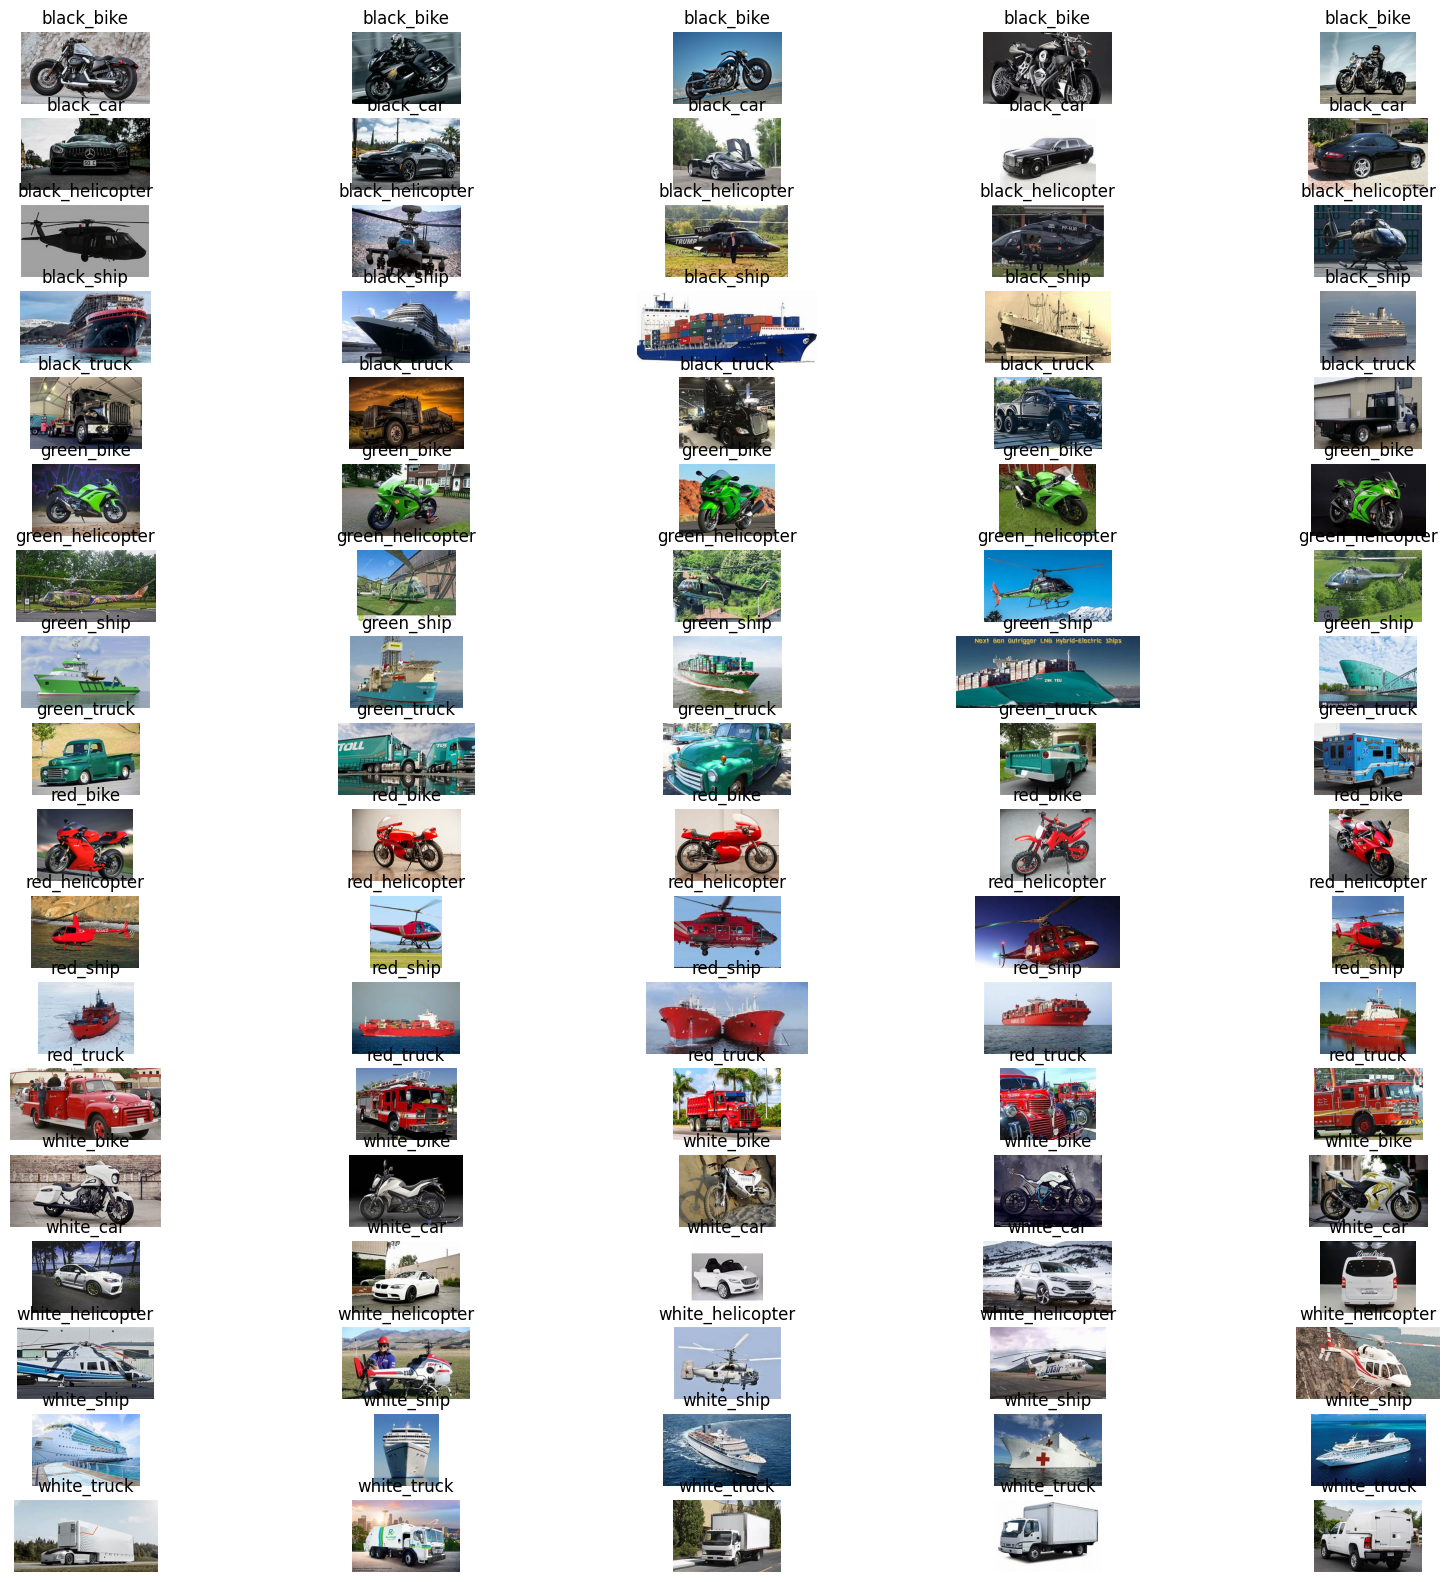

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image

def display_images(directory, num_images_per_category=5):
    plt.figure(figsize=(20, 20))

    categories = sorted(os.listdir(directory))  # Ensure consistent order of categories

    for i, category in enumerate(categories):
        category_path = os.path.join(directory, category)

        if os.path.isdir(category_path):
            image_files = [os.path.join(category_path, file) for file in os.listdir(category_path) if file.lower().endswith(('.png', '.jpg', '.jpeg'))]

            for j in range(min(num_images_per_category, len(image_files))):
                img = Image.open(image_files[j])
                plt.subplot(len(categories), num_images_per_category, i * num_images_per_category + j + 1)
                plt.imshow(img)
                plt.title(category)
                plt.axis("off")

    plt.show()

# Example: Display 5 images from each category in the 'automobile' directory
display_images("/content/drive/MyDrive/automobile", num_images_per_category=5)

In [ ]:
import cv2
import os
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
data_dir = '/content/drive/MyDrive/automobile'

In [ ]:
list_of_data = []
img_size = 128
for fol in os.listdir(data_dir):
    for file in os.listdir(os.path.join(data_dir, fol)):
        json_dict = {}
        img_arr = cv2.imread(os.path.join(os.path.join(data_dir, fol), file))[...,::-1] #convert BGR to RGB format
        # print(img_arr.shape)
        resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
        # print(resized_arr.shape)
        json_dict['image'] = resized_arr
        json_dict['class_1'] = fol.split('_')[0]
        json_dict['class_2'] = fol.split('_')[1]
        list_of_data.append(json_dict)
x_train = []
y_train = []

for i in range(0, len(list_of_data)):
    x_train.append(list_of_data[i]['image'])
    y_train.append([list_of_data[i]['class_1'], list_of_data[i]['class_2']])

x_train = np.array(x_train) / 255
x_train = x_train.reshape(x_train.shape[0], img_size, img_size, 3)


In [ ]:
x_train[0]

array([[[0.4745098 , 0.38823529, 0.3372549 ],
        [0.60392157, 0.52156863, 0.47058824],
        [0.69019608, 0.62352941, 0.56862745],
        ...,
        [0.70588235, 0.61568627, 0.58431373],
        [0.6627451 , 0.57254902, 0.54117647],
        [0.7254902 , 0.63529412, 0.60392157]],

       [[0.58039216, 0.49411765, 0.44313725],
        [0.61960784, 0.5372549 , 0.48627451],
        [0.63137255, 0.56078431, 0.50588235],
        ...,
        [0.70196078, 0.61568627, 0.57647059],
        [0.5372549 , 0.44705882, 0.41176471],
        [0.60392157, 0.51372549, 0.47843137]],

       [[0.58039216, 0.49411765, 0.44313725],
        [0.57254902, 0.49019608, 0.43529412],
        [0.56470588, 0.49411765, 0.43921569],
        ...,
        [0.60392157, 0.51764706, 0.4745098 ],
        [0.5254902 , 0.43921569, 0.39607843],
        [0.5254902 , 0.43921569, 0.39607843]],

       ...,

       [[0.54117647, 0.50980392, 0.49803922],
        [0.53333333, 0.50196078, 0.49019608],
        [0.5372549 , 0

In [ ]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images
datagen.fit(x_train)

In [ ]:
x_train[0]

array([[[0.4745098 , 0.38823529, 0.3372549 ],
        [0.60392157, 0.52156863, 0.47058824],
        [0.69019608, 0.62352941, 0.56862745],
        ...,
        [0.70588235, 0.61568627, 0.58431373],
        [0.6627451 , 0.57254902, 0.54117647],
        [0.7254902 , 0.63529412, 0.60392157]],

       [[0.58039216, 0.49411765, 0.44313725],
        [0.61960784, 0.5372549 , 0.48627451],
        [0.63137255, 0.56078431, 0.50588235],
        ...,
        [0.70196078, 0.61568627, 0.57647059],
        [0.5372549 , 0.44705882, 0.41176471],
        [0.60392157, 0.51372549, 0.47843137]],

       [[0.58039216, 0.49411765, 0.44313725],
        [0.57254902, 0.49019608, 0.43529412],
        [0.56470588, 0.49411765, 0.43921569],
        ...,
        [0.60392157, 0.51764706, 0.4745098 ],
        [0.5254902 , 0.43921569, 0.39607843],
        [0.5254902 , 0.43921569, 0.39607843]],

       ...,

       [[0.54117647, 0.50980392, 0.49803922],
        [0.53333333, 0.50196078, 0.49019608],
        [0.5372549 , 0

In [ ]:
y_train = np.array(y_train)
class_1 = y_train[:,0]
class_2 = y_train[:,1]
c_1 = len(set(class_1))
c_2 = len(set(class_2))

map_1 = {}
for i, j in enumerate(list(set(class_1))):
    map_1[j] = i

map_2 = {}
for i, j in enumerate(list(set(class_2))):
    map_2[j] = i

class_arr1 = []
for x in class_1:
    class_arr1.append(map_1[x])
class_arr1 = np.array(class_arr1)

class_arr2 = []
for x in class_2:
    class_arr2.append(map_2[x])
class_arr2 = np.array(class_arr2)

In [ ]:
inputs = tf.keras.layers.Input(shape=[128, 128, 3], name='main_input')
main_branch = hub.KerasLayer("https://tfhub.dev/google/imagenet/mobilenet_v2_075_128/classification/5")(inputs)
main_branch = tf.keras.layers.Flatten()(main_branch)
main_branch = tf.keras.layers.Dense(1024, activation='relu')(main_branch)
colour_branch = tf.keras.layers.Dense(c_1, activation='softmax', name='colour_output')(main_branch)
auto_branch = tf.keras.layers.Dense(c_2, activation='softmax', name='auto_output')(main_branch)
model = tf.keras.Model(inputs = inputs,
outputs = [colour_branch, auto_branch])

model.compile(optimizer='rmsprop',
              loss={'colour_output': 'sparse_categorical_crossentropy', 'auto_output': 'sparse_categorical_crossentropy'},
              loss_weights={'colour_output': .001, 'auto_output': 1.})

model.fit({'main_input': x_train},
          {'colour_output': class_arr1, 'auto_output': class_arr2},
          epochs=10, batch_size=128,
          verbose=1,
          validation_split=0.2)

Epoch 1/10
6/6 [==============================] - 16s 2s/step - loss: 0.7094 - colour_output_loss: 1.6623 - auto_output_loss: 0.7077 - val_loss: 0.3221 - val_colour_output_loss: 3.2289 - val_auto_output_loss: 0.3188
Epoch 2/10
6/6 [==============================] - 11s 2s/step - loss: 0.0075 - colour_output_loss: 1.4189 - auto_output_loss: 0.0061 - val_loss: 0.1793 - val_colour_output_loss: 3.5332 - val_auto_output_loss: 0.1758
Epoch 3/10
6/6 [==============================] - 10s 2s/step - loss: 0.0028 - colour_output_loss: 1.2655 - auto_output_loss: 0.0016 - val_loss: 0.1764 - val_colour_output_loss: 3.6380 - val_auto_output_loss: 0.1728
Epoch 4/10
6/6 [==============================] - 11s 2s/step - loss: 0.0016 - colour_output_loss: 1.1295 - auto_output_loss: 4.4315e-04 - val_loss: 0.1749 - val_colour_output_loss: 3.8061 - val_auto_output_loss: 0.1711
Epoch 5/10
6/6 [==============================] - 9s 2s/step - loss: 0.0014 - colour_output_loss: 1.0239 - auto_output_loss: 3.7386e

In [ ]:
dir_2 = '/content/drive/MyDrive/auto2/image'
test_list = []

for file in os.listdir(dir_2):
    # Check if the file has an extension
    if '.' in file:
        file_extension = file.split('.')[-1]
        if file_extension.lower() != 'ipynb':
            json_dict = {}
            img_arr = cv2.imread(os.path.join(dir_2, file))[...,::-1] # convert BGR to RGB format
            resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshape images to the preferred size
            json_dict['image'] = resized_arr
            test_list.append(json_dict)

test = np.array(test_list)
x_test = []

for i in range(0, test.shape[0]):
    x_test.append(test[i]['image'])

x_test = np.array(x_test) / 255
x_test = x_test.reshape(x_test.shape[0], img_size, img_size, 3)
x_test.shape


(4, 128, 128, 3)

In [ ]:
preds = model.predict(x_test)
col = []
aut = []
for i in range(0, preds[0].shape[0]):
  col.append(np.argmax(preds[0][i]))
  aut.append(np.argmax(preds[1][i]))
  re_map1 = {}
for k, v in map_1.items():
  re_map1[v] = k
  re_map2 = {}
for k, v in map_2.items():
  re_map2[v] = k


1/1 [==============================] - 0s 89ms/step


In [ ]:
for i in range(0,len(col)):
  print (re_map1[col[i]],re_map2[aut[i]])

green ship
red truck
white car
green helicopter


In [ ]:
print(class_arr1)
print(class_arr2)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 0 0 0 0 0 0 0 0 0 0 0 